In [3]:
import pandas as pd
from darts import TimeSeries

In [6]:
df = pd.read_csv('don_20240502_NbArrivees_vf.csv', sep=';', parse_dates=['dhreinscription'])
df.head()
series = TimeSeries.from_dataframe(df, "dhreinscription", "Total")
train, val = series[:-28], series[-28:]

In [7]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

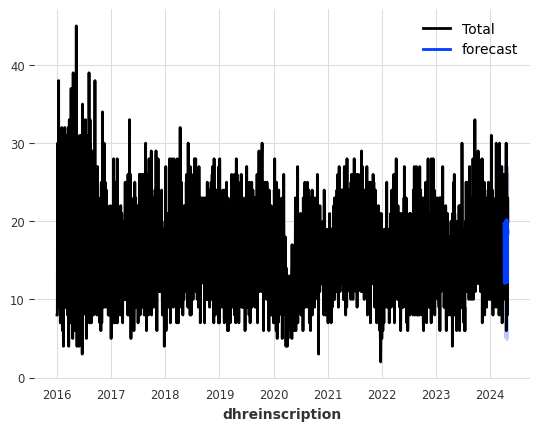

In [8]:
import matplotlib.pyplot as plt

series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [10]:
from darts.models import ExponentialSmoothing, TBATS, AutoARIMA, Theta
from darts.metrics import mape



def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print("model {} obtains MAPE: {:.2f}%".format(model, mape(val, forecast)))


eval_model(ExponentialSmoothing())
eval_model(TBATS())
eval_model(AutoARIMA())
eval_model(Theta())

model ExponentialSmoothing() obtains MAPE: 20.82%


/home/gdevenyi/projects/C3_admissions/timeseries/lib/python3.12/site-packages/tbats/transformation/BoxCox.py:32: RuntimeWarning: overflow encountered in exp
  return np.exp(y)
/home/gdevenyi/projects/C3_admissions/timeseries/lib/python3.12/site-packages/tbats/transformation/BoxCox.py:32: RuntimeWarning: overflow encountered in exp
  return np.exp(y)
/home/gdevenyi/projects/C3_admissions/timeseries/lib/python3.12/site-packages/tbats/transformation/BoxCox.py:32: RuntimeWarning: overflow encountered in exp
  return np.exp(y)
/home/gdevenyi/projects/C3_admissions/timeseries/lib/python3.12/site-packages/tbats/transformation/BoxCox.py:32: RuntimeWarning: overflow encountered in exp
  return np.exp(y)
/home/gdevenyi/projects/C3_admissions/timeseries/lib/python3.12/site-packages/tbats/transformation/BoxCox.py:32: RuntimeWarning: overflow encountered in exp
  return np.exp(y)
/home/gdevenyi/projects/C3_admissions/timeseries/lib/python3.12/site-packages/tbats/transformation/BoxCox.py:32: Runtime

model TBATS() obtains MAPE: 20.44%
model AutoARIMA() obtains MAPE: 21.08%
model Theta() obtains MAPE: 20.85%
